In [239]:
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

In [240]:
df=pd.read_csv('EEGdata.csv')
df.head()

,A,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [241]:
X=df.values

In [242]:
X=X[:,1:-1]

In [243]:
X=df.values
X=X[:,1:-1]
X = np.asarray(X).astype(np.float32)
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

In [244]:
print(X.shape,y.shape)

(11500, 178) (11500,)


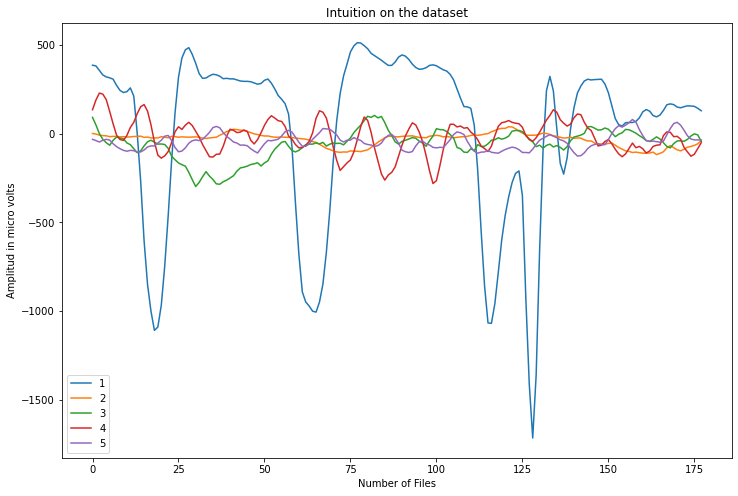

In [245]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.xlabel("Number of Files")
plt.ylabel("Amplitud in micro volts")
plt.title("Intuition on the dataset")
plt.show()

In [246]:
model=Sequential()


model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 256)               11776     
                                                                 
 activation_77 (Activation)  (None, 256)               0         
                                                                 
 dense_78 (Dense)            (None, 128)               32896     
                                                                 
 activation_78 (Activation)  (None, 128)               0         
                                                                 
 dense_79 (Dense)            (None, 128)               16512     
                                                                 
 activation_79 (Activation)  (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 64)               

In [247]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'AUC', 'Recall', 'Precision'])


In [248]:
fits=model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],10,100,verbose=2,validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:]))

Epoch 1/100
920/920 - 4s - loss: 0.4089 - accuracy: 0.4513 - auc: 0.7840 - recall: 0.2084 - precision: 0.7831 - val_loss: 0.3257 - val_accuracy: 0.5613 - val_auc: 0.8702 - val_recall: 0.3287 - val_precision: 0.7762 - 4s/epoch - 5ms/step
Epoch 2/100
920/920 - 2s - loss: 0.2895 - accuracy: 0.6245 - auc: 0.9046 - recall: 0.4900 - precision: 0.7171 - val_loss: 0.2722 - val_accuracy: 0.6387 - val_auc: 0.9173 - val_recall: 0.5952 - val_precision: 0.6787 - 2s/epoch - 3ms/step
Epoch 3/100
920/920 - 2s - loss: 0.2483 - accuracy: 0.6642 - auc: 0.9304 - recall: 0.6140 - precision: 0.7034 - val_loss: 0.2587 - val_accuracy: 0.6617 - val_auc: 0.9237 - val_recall: 0.6387 - val_precision: 0.6782 - 2s/epoch - 3ms/step
Epoch 4/100
920/920 - 3s - loss: 0.2309 - accuracy: 0.6934 - auc: 0.9406 - recall: 0.6537 - precision: 0.7242 - val_loss: 0.2634 - val_accuracy: 0.6583 - val_auc: 0.9219 - val_recall: 0.6065 - val_precision: 0.7014 - 3s/epoch - 3ms/step
Epoch 5/100
920/920 - 2s - loss: 0.2192 - accuracy: 

In [249]:
ypred=model.predict((X_test[:,::4]-X_test.mean())/X_test.std())
ypred.shape

(2300, 5)

In [250]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [251]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [252]:
yp.shape

(2300,)

In [253]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [254]:
np.unique(Y_test)

array([0., 1.], dtype=float32)

In [255]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [256]:
np.unique(yo)

array([0., 1.])

In [257]:
from sklearn.metrics import accuracy_score

In [258]:
accuracy_score(yo,yp)

0.9765217391304348

In [274]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import sensitivity
#from sklearn.metrics import specificity
accuracy = accuracy_score(yo,yp)
print("Accuracy: %f" % accuracy)
precision = precision_score(yo,yp)
print("Precision: %f" % precision)
recall = recall_score(yo,yp)
print("Recall: %f" % recall)
f1 = f1_score(yo,yp)
print("F1_score: %f" % f1)
#sensitivity = sensitivity(yo,yp)
#print("F1_score: %f" % f1)
#specificity = specificity(yo,yp)
#print("F1_score: %f" % f1)

Accuracy: 0.976522
Precision: 0.962963
Recall: 0.916300
F1_score: 0.939052


In [260]:
cm=confusion_matrix(yo,yp)
cm

array([[1830,   16],
       [  38,  416]], dtype=int64)

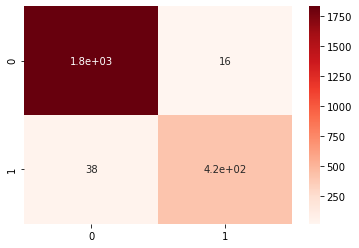

In [261]:
import seaborn as sns
#sns.heatmap(cm)
sns.heatmap(cm,cmap="Reds",annot=True)
plt.show()

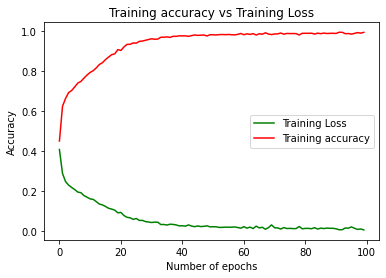

In [262]:
plt.figure(0)
plt.plot(fits.history['loss'],'g',label='Training Loss')
plt.plot(fits.history['accuracy'],'r',label='Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Training Loss")
plt.legend()
plt.show()

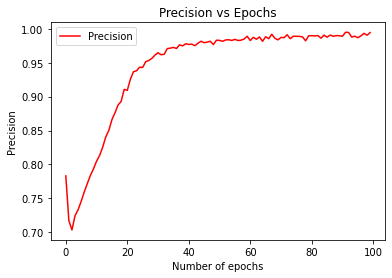

In [263]:
#plt.figure(0)
plt.plot(fits.history['precision'],'r',label='Precision')
plt.xlabel("Number of epochs")
plt.ylabel("Precision")
plt.title("Precision vs Epochs")
plt.legend()
plt.show()

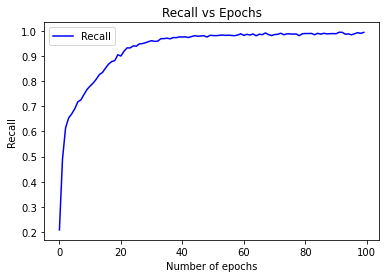

In [264]:
plt.plot(fits.history['recall'],'b',label='Recall')
plt.xlabel("Number of epochs")
plt.ylabel("Recall")
plt.title("Recall vs Epochs")
plt.legend()
plt.show()

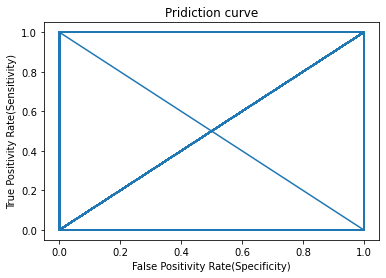

In [178]:
#fpr,tpr,_=metrics.roc_curve(yo,yp)
plt.plot(yo,yp)
plt.xlabel('False Positivity Rate(Specificity)')
plt.ylabel('True Positivity Rate(Sensitivity)')
plt.title("Pridiction curve")
plt.show()

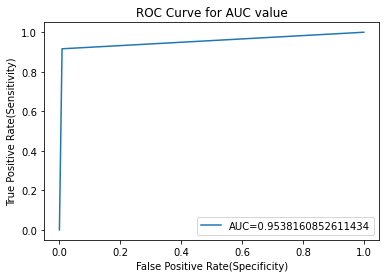

In [265]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
fpr,tpr,thresholds=roc_curve(yo,yp)
fpr, tpr, _ = metrics.roc_curve(yo,yp)
auc = metrics.roc_auc_score(yo, yp)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.legend(loc=4)
plt.title("ROC Curve for AUC value")
plt.show()

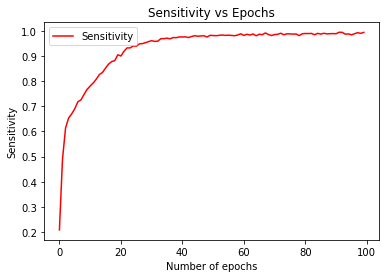

In [266]:
plt.plot(fits.history['recall'],'r',label='Sensitivity')
plt.xlabel("Number of epochs")
plt.ylabel("Sensitivity")
plt.title("Sensitivity vs Epochs")
plt.legend()
plt.show()

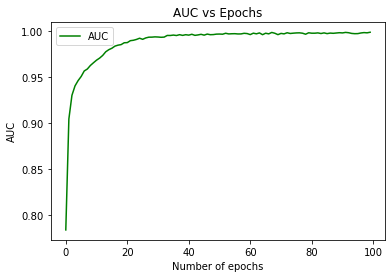

In [271]:
plt.plot(fits.history['auc'],'g',label='AUC')
plt.xlabel("Number of epochs")
plt.ylabel("AUC")
plt.title("AUC vs Epochs")
plt.legend()
plt.show()